In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load data

In [84]:
df = pd.read_csv("smartcart_customers.csv")

In [85]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [86]:
df.shape

(2240, 22)

# DATA PREPROCESSING
  # => Handling Missing values

In [87]:
df["Income"] = df["Income"].fillna(df["Income"].mean())

In [88]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,42,14,2,6,4,10,6,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,50,49,27,4,7,3,7,6,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,3,1,23,2,4,0,4,8,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,3,3,2,1,3,0,2,9,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,1,1,13,1,1,0,0,20,0,0


# => feature engineering

In [89]:
# Age
df["Age"] = 2026-df["Year_Birth"]

In [90]:
# customer date of joining
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst=True)
reference_date = df["Dt_Customer"].max()
df["Customer_Tenure_Days"] = (reference_date-df["Dt_Customer"]).dt.days

In [91]:
# No.of children 
df["Total_children"] = df["Kidhome"]+df["Teenhome"]

In [92]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days',
       'Total_children'],
      dtype='object')

In [93]:
# Total amount spent
df["Total_spending"] = df["MntFishProducts"]+df["MntWines"]+df["MntGoldProds"]+df["MntSweetProducts"]+df["MntFruits"]+df["MntMeatProducts"]

In [94]:
# Education 
df["Education"] = df["Education"].replace({
    "Basic" :"Undergraduate",
    "2n Cycle":"Undergraduate",
    "Graduation":"Graduate",
    "Master":"Postgraduate",
    "PhD": "Postgraduate"
})

In [95]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [96]:
# Marital_status
df["Living_with"] = df["Marital_Status"].replace({
    "Married":"Partner",
    "Together":"Partner",
    "Single":"Alone",
    "Divorced":"Alone",
    "Widow":"Alone",
    "Absurd":"Alone",
    "YOLO":"Alone"
})

In [97]:
df["Living_with"].value_counts()

Living_with
Partner    1444
Alone       796
Name: count, dtype: int64

In [98]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_children,Total_spending,Living_with
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,0,1617,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,2,27,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,0,776,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,1,53,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,1,422,Partner


# Drop Columns 

In [99]:

col = ["ID","Marital_Status","Year_Birth","Kidhome","Teenhome","Dt_Customer",]
spending_col = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
cols = col+spending_col
df_cleaned = df.drop(columns=cols)

In [100]:
df_cleaned.shape

(2240, 15)

In [101]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_children,Total_spending,Living_with
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,0,1617,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,2,27,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,0,776,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,1,53,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,1,422,Partner


# Outlier

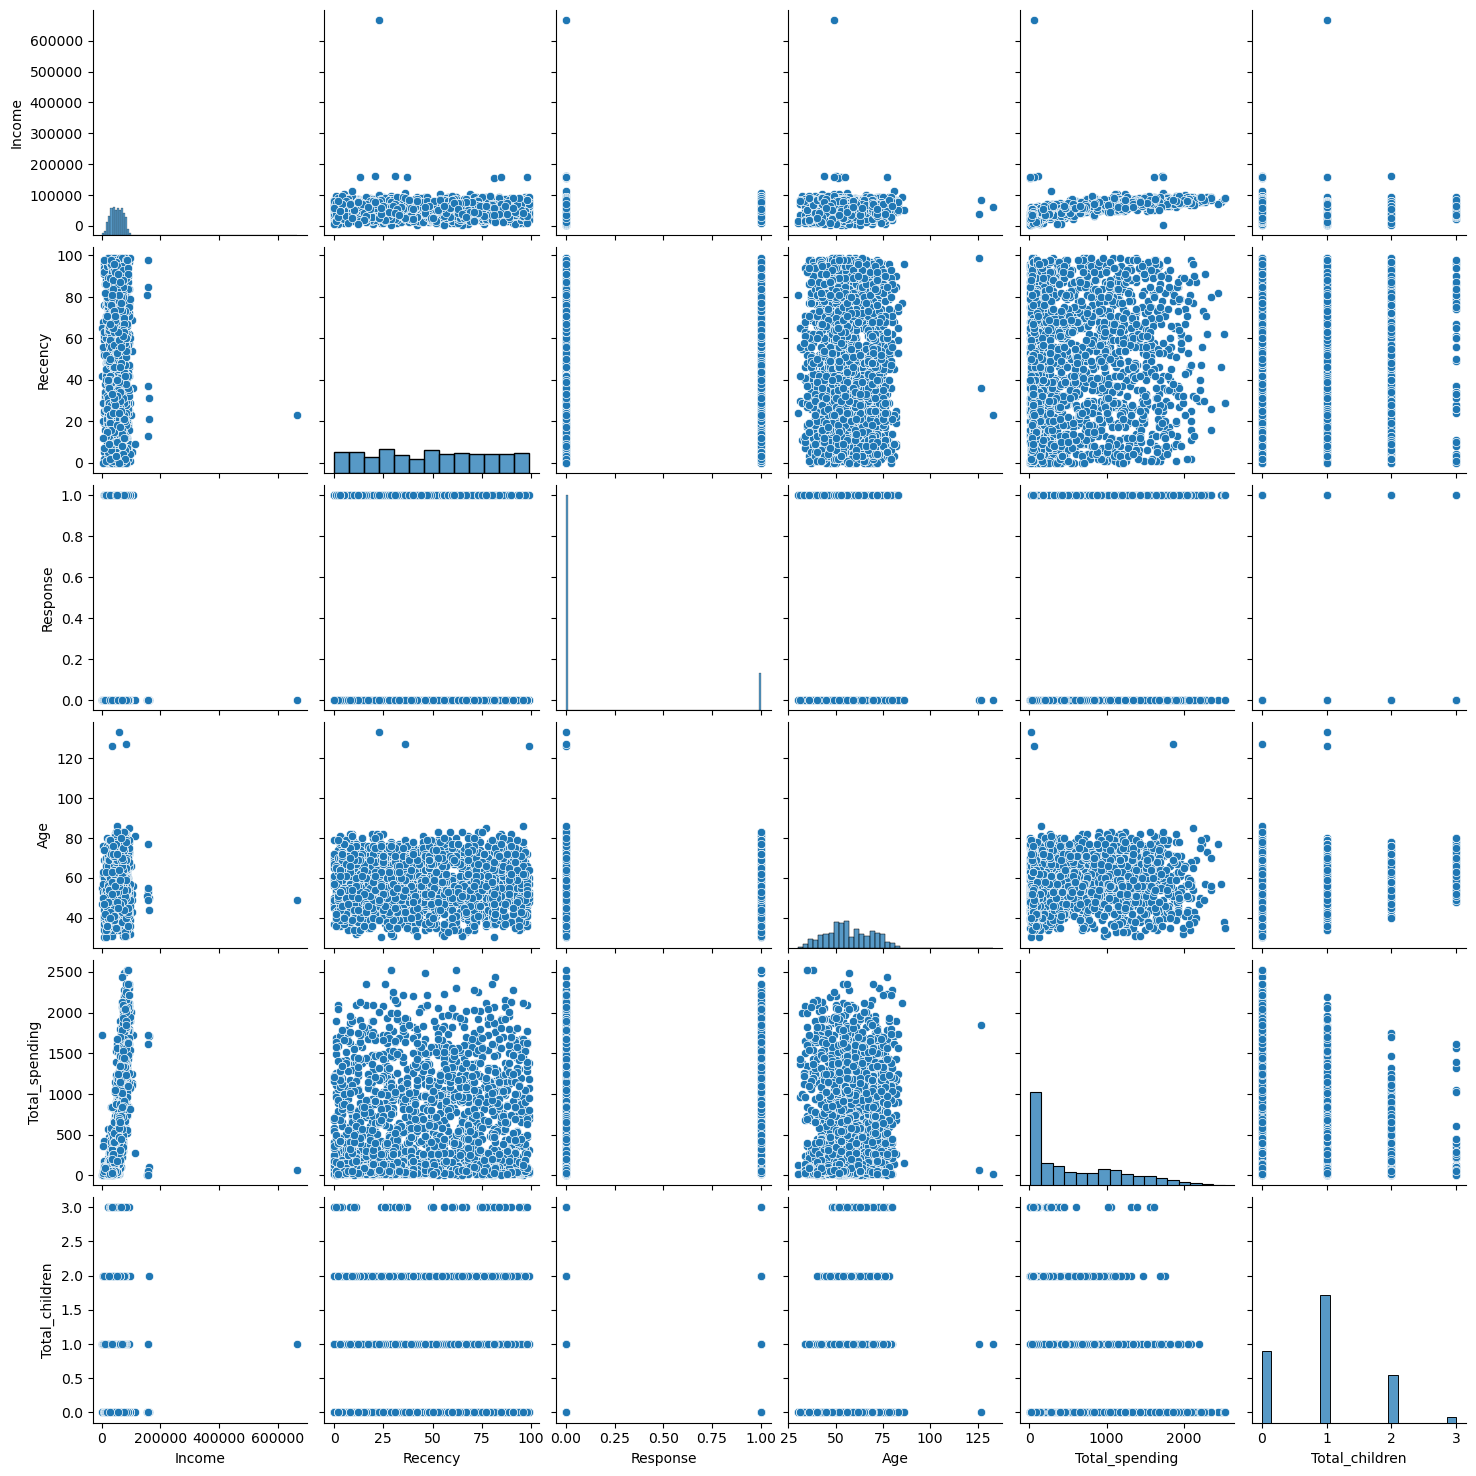

In [102]:
cols = ["Income", "Recency", "Response", "Age", "Total_spending", "Total_children"]
sns.pairplot(df_cleaned[cols])

In [103]:
# Remove outliers
print("data size with outliers:", len(df_cleaned))

df_cleaned = df_cleaned[ (df_cleaned["Age"] < 90) ]
df_cleaned = df_cleaned[ (df_cleaned["Income"] < 600_000) ]

print("data size without outliers:", len(df_cleaned))

data size with outliers: 2240
data size without outliers: 2236


# CorrelationHeatmap

In [104]:
corr =df_cleaned.corr(numeric_only=True)


<Axes: >

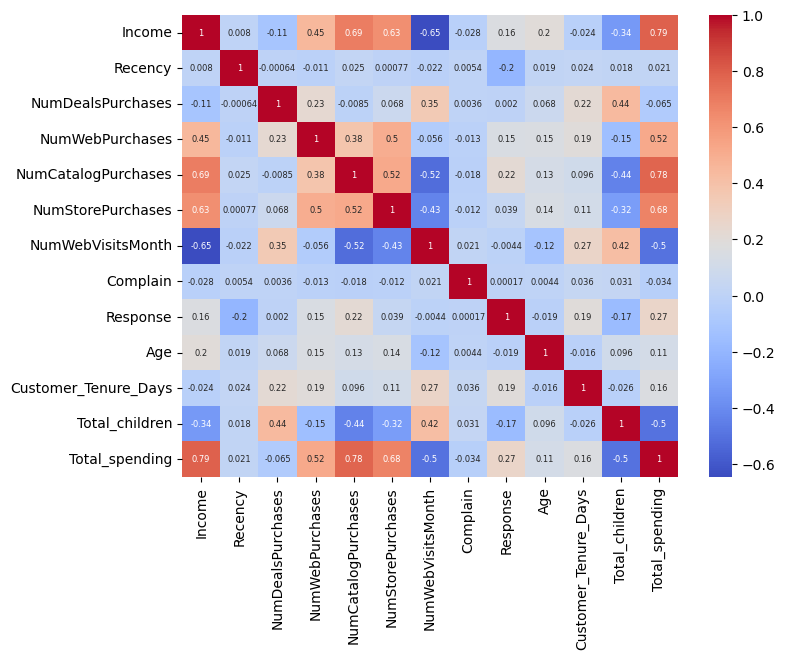

In [106]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size":6},
    cmap="coolwarm"
)


# Encoding

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
col = ["Living_with","Education"]
ohe = OneHotEncoder()
encoded  = ohe.fit_transform(df_cleaned[col])
encoded_df = pd.DataFrame(encoded.toarray(),columns=ohe.get_feature_names_out(col),index=df_cleaned.index)


In [115]:
df_encoded = pd.concat([df_cleaned.drop(columns=col),encoded_df],axis=1)

In [116]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_children,Total_spending,Living_with_Alone,Living_with_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,58138.0,58,3,8,10,4,7,0,1,69,663,0,1617,1.0,0.0,1.0,0.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,2,27,1.0,0.0,1.0,0.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,0,776,0.0,1.0,1.0,0.0,0.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,1,53,0.0,1.0,1.0,0.0,0.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,1,422,0.0,1.0,0.0,1.0,0.0


# StandardScaling 

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
x = df_encoded

In [119]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [120]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Visualize

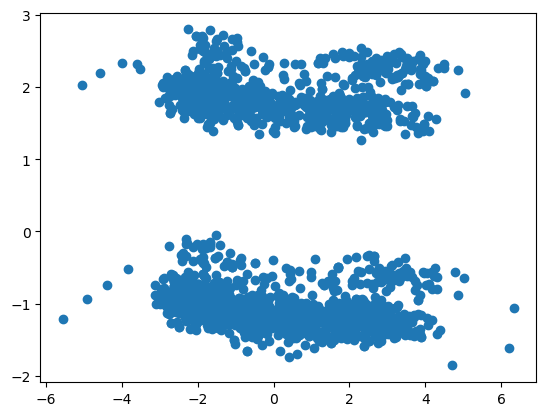

In [124]:
plt.scatter(x_pca[:,0],x_pca[:,1])

In [126]:
pca.explained_variance_ratio_

array([2.31622864e-01, 1.13854366e-01, 1.04058202e-01, 9.91211273e-02,
       7.73019750e-02, 6.45852325e-02, 5.55335743e-02, 5.34426990e-02,
       4.56546773e-02, 3.90186839e-02, 3.36598547e-02, 2.49645217e-02,
       2.21591564e-02, 1.58940556e-02, 1.16157978e-02, 7.51321338e-03,
       1.49986588e-17, 0.00000000e+00])

In [128]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

Text(0.5, 0.92, '3D Projection')

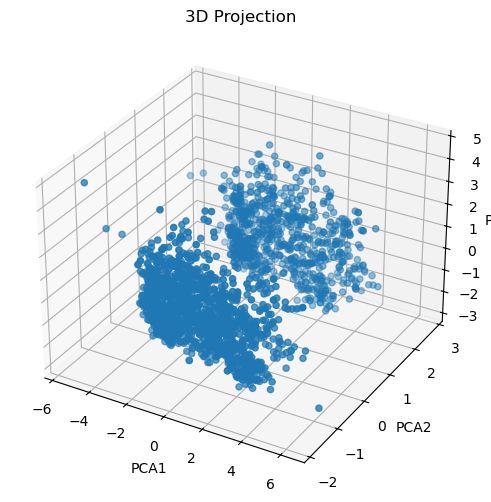

In [137]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2])
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D Projection")

In [138]:
pca.explained_variance_ratio_

array([0.23162286, 0.11385437, 0.1040582 ])

# Analyse k values

# elbow method

In [143]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [144]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit_predict(x_pca)
    wcss.append(kmeans.inertia_)
    

In [145]:
knee  = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
print("Best k:",knee.elbow)

Best k: 4


Text(0, 0.5, 'wcss')

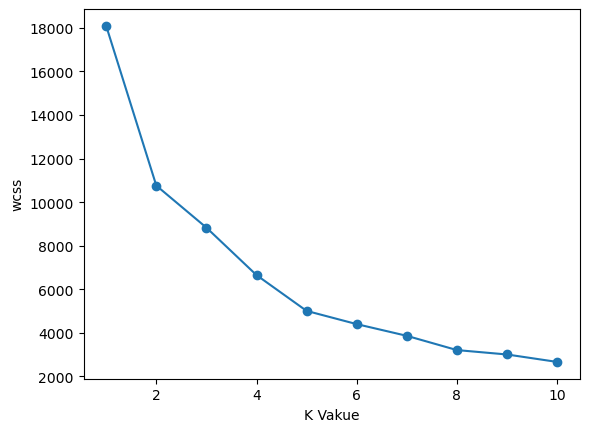

In [147]:
plt.plot(range(1,11),wcss,marker="o")
plt.xlabel("K Vakue")
plt.ylabel("wcss")

# silhouette score

In [148]:
from  sklearn.metrics import silhouette_score

In [149]:
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    labels = kmeans.fit_predict(x_pca)
    score = silhouette_score(x_pca,labels)
    scores.append(score)

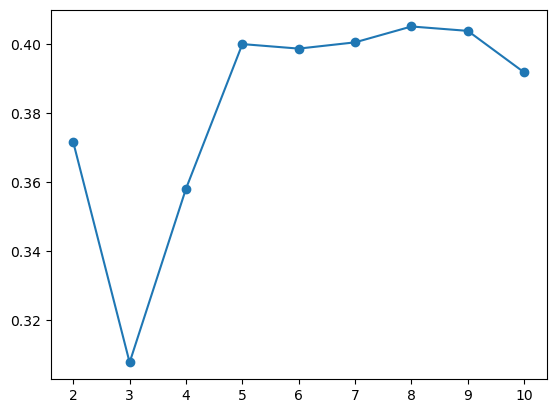

In [150]:
plt.plot(range(2,11),scores,marker="o")

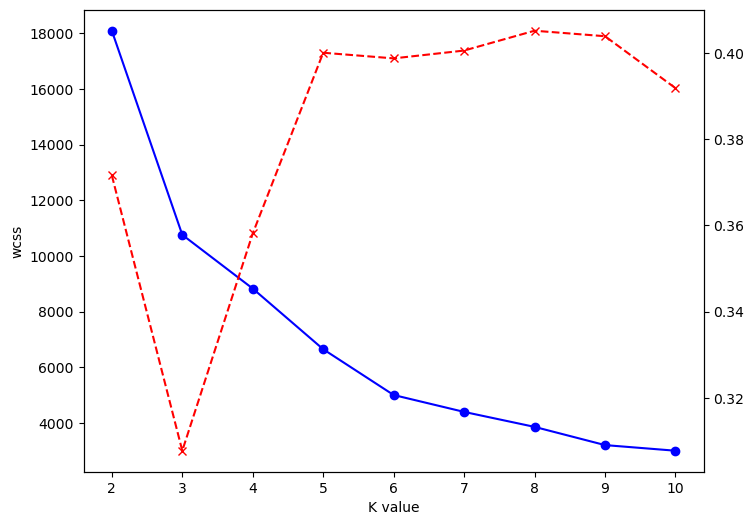

In [158]:
k_range = range(2,11)
fig,ax1 = plt.subplots(figsize=(8,6))
ax1.plot(k_range,wcss[:len(k_range)],marker="o",color="blue")
ax1.set_xlabel("K value")
ax1.set_ylabel("wcss")
ax2 = ax1.twinx()
ax2.plot(k_range,scores[:len(k_range)],marker="x",color="red",linestyle="--")

# Clustering

In [160]:
# K-Menas 
from sklearn.cluster import KMeans

In [161]:
kmeans = KMeans(n_clusters=4,random_state=42)
label = kmeans.fit_predict(x_pca)

Text(0.5, 0.92, '3D Projection')

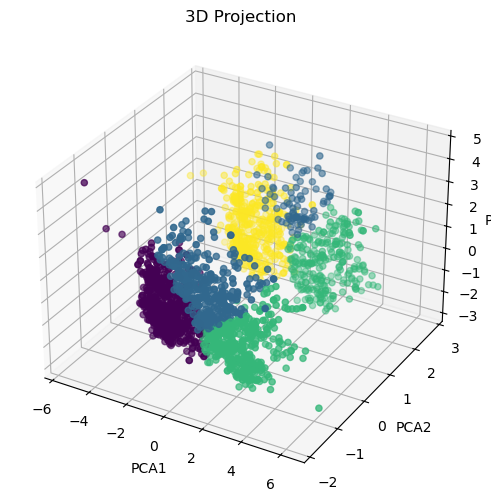

In [162]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=label)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D Projection")

In [163]:
# Hierarchial clustering 
from sklearn.cluster import AgglomerativeClustering

In [164]:
Model = AgglomerativeClustering(n_clusters=4,linkage="ward")
Labels = Model.fit_predict(x_pca)

Text(0.5, 0.92, '3D Projection')

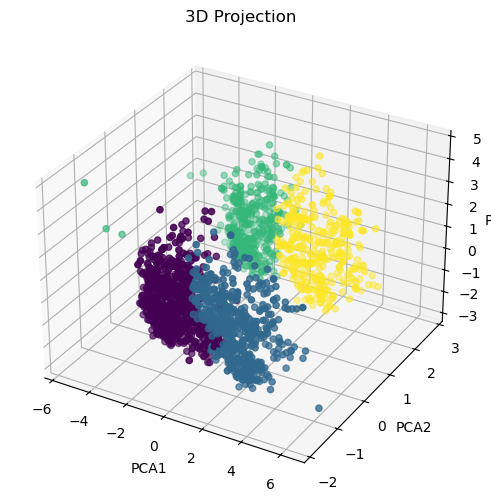

In [165]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=Labels)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D Projection")

# Characterization of cluster

In [175]:
x["cluster"] = Labels

<Axes: xlabel='cluster', ylabel='count'>

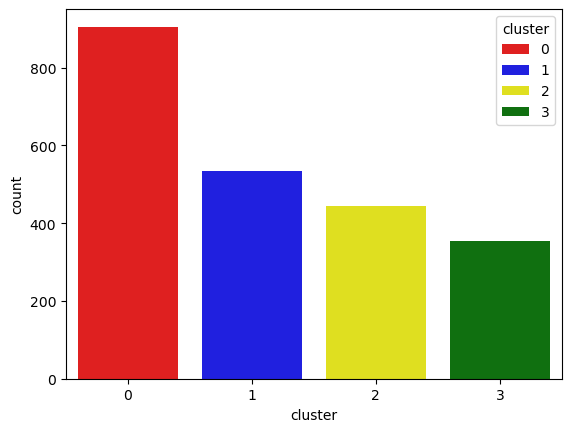

In [176]:
pal = ["red", "blue", "yellow", "green"]

sns.countplot(x=x["cluster"], palette=pal, hue=x["cluster"])

<Axes: xlabel='Total_spending', ylabel='Income'>

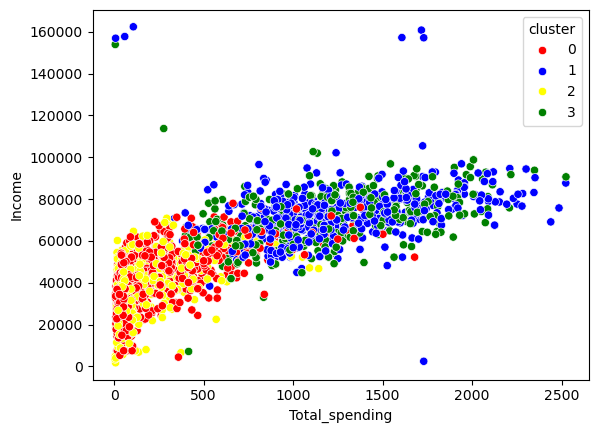

In [177]:
pal = ["red", "blue", "yellow", "green"]

sns.scatterplot(x=x["Total_spending"],y=x["Income"] ,palette=pal, hue=x["cluster"])

In [179]:
# cluster summary
cluster_summary = x.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39690.146424  48.914917           2.594475         3.153591   
1        72814.930722  49.202247           1.958801         5.687266   
2        36973.792251  48.319820           2.594595         2.713964   
3        70730.038963  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_children  \
cluster         